In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output
from tqdm.notebook import tqdm
import cv2
from sklearn.model_selection import train_test_split
import random

In [ ]:
import csv
path = "/content/drive/MyDrive/mias 1/mias_info.csv"

In [ ]:
df = pd.read_csv(path)
df

,ref_num,bg_tissue,ab_class,ab_severity,x_center_ab,y_center_ab,radius_ab
0,mdb001,G,CIRC,B,535,425,197
1,mdb002,G,CIRC,B,522,280,69
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477,133,30
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN


In [ ]:
imgs_path = '/content/drive/MyDrive/mias 1/pgm_files/' #assigning the image path value to imgs_path

In [ ]:
ids = {}
for i in range(len(df)):
    ids[i] = df.ref_num[i]

In [ ]:
# Turning our outputs NORMAL - CANCEROUS to 0-1
label = []
for i in range(len(df)):
    if df.ab_class[i] != 'NORM':
        label.append(1)
    else:
        label.append(0)
label = np.array(label)
print(f"Total Images: {len(label)}\nNon-Cancerous: {len(label)-np.sum(label)}\nCancerous: {np.sum(label)}")

Total Images: 330
Non-Cancerous: 207
Cancerous: 123


In [ ]:
# define the every images filepaths in to list
img_name = []

for i in range(len(label)):
        img_name.append(imgs_path + df.ref_num[i]+ '.pgm')

In [ ]:
img_name = np.array(img_name)
img_name.shape

(330,)

In [ ]:
img_name

array(['/content/drive/MyDrive/mias 1/pgm_files/mdb001.pgm',
       '/content/drive/MyDrive/mias 1/pgm_files/mdb002.pgm',
       '/content/drive/MyDrive/mias 1/pgm_files/mdb003.pgm',
       '/content/drive/MyDrive/mias 1/pgm_files/mdb004.pgm',
       '/content/drive/MyDrive/mias 1/pgm_files/mdb005.pgm',
       '/content/drive/MyDrive/mias 1/pgm_files/mdb005.pgm',
       '/content/drive/MyDrive/mias 1/pgm_files/mdb006.pgm',
       '/content/drive/MyDrive/mias 1/pgm_files/mdb007.pgm',
       '/content/drive/MyDrive/mias 1/pgm_files/mdb008.pgm',
       '/content/drive/MyDrive/mias 1/pgm_files/mdb009.pgm',
       '/content/drive/MyDrive/mias 1/pgm_files/mdb010.pgm',
       '/content/drive/MyDrive/mias 1/pgm_files/mdb011.pgm',
       '/content/drive/MyDrive/mias 1/pgm_files/mdb012.pgm',
       '/content/drive/MyDrive/mias 1/pgm_files/mdb013.pgm',
       '/content/drive/MyDrive/mias 1/pgm_files/mdb014.pgm',
       '/content/drive/MyDrive/mias 1/pgm_files/mdb015.pgm',
       '/content/drive/M

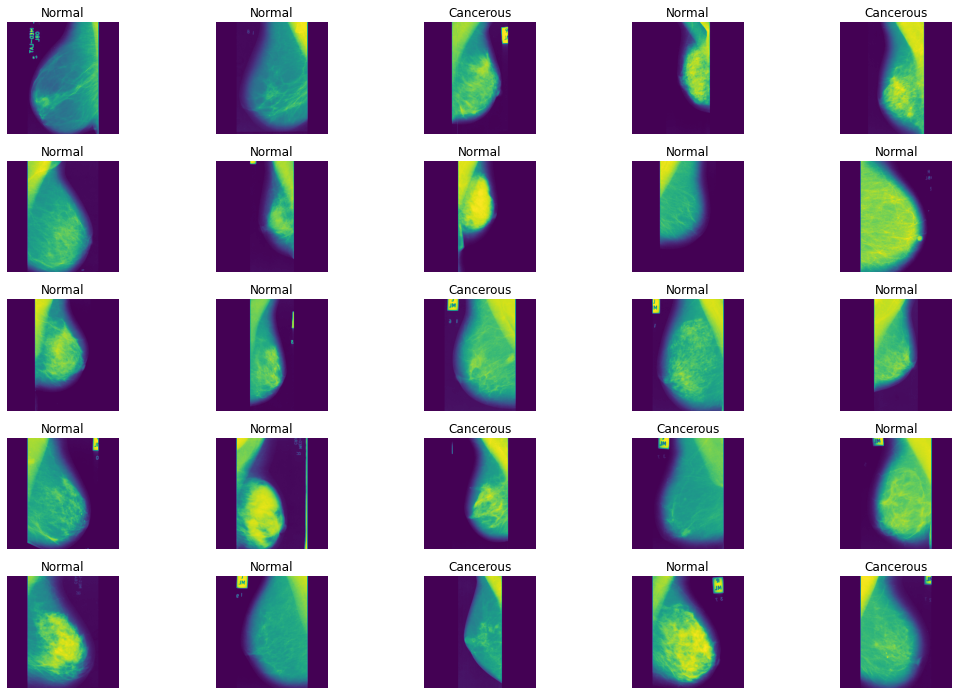

In [ ]:
def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(25):
        rand = random.randint(0,len(label))
        ax = plt.subplot(5, 5, i+1)
    
        img = cv2.imread(img_name[rand], 0)
        img = cv2.resize(img, (256,256))
        if label[rand] == 1:
            plt.title('Cancerous')
        else:
            plt.title('Normal')
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img)
    fig.savefig('random_25_image_fig.png')

random_images = view_25_random_image()

In [ ]:
! pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers
from keras import losses
from sklearn import metrics
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers.pooling import AveragePooling2D as AvgPool2D

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.9200):
      print("\nReached limit cancel any further epochs:")
      print(logs)
      self.model.stop_training = True

callbacks = myCallback()  


In [ ]:
img_path = []
last_label = []
img_size = 128

for i in range(len(img_name)):
    
    img = cv2.imread(img_name[i], 0)
    img = cv2.resize(img, (img_size,img_size))
    rows, cols= img.shape
    for angle in range(180):
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle*2, 1)    #Rotate 0 degree
            img_rotated = cv2.warpAffine(img, M, (img_size, img_size))
            img_path.append(img_rotated)
            if label[i] == 1:
                last_label.append(1)
            else:
                last_label.append(0)

In [ ]:
img_path = np.array(img_path)
last_label = np.array(last_label)
img_path.shape

(59400, 128, 128)

In [ ]:
img_path = img_path.reshape((-1,img_size,img_size,1))
img_path.shape

(59400, 128, 128, 1)

In [ ]:
last_label.shape

(59400,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(img_path, last_label, test_size = 0.2)

In [ ]:
reg = tf.keras.regularizers.L2(l2=1e-5)
ini = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02, seed=None)


model = Sequential()
model.add(Conv2D(32,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer = ini,
                 input_shape=(img_size, img_size, 1)))
model.add(Conv2D(64,
                 kernel_size=(3,3),
                 kernel_initializer = ini,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, 
                 kernel_size=(3,3),
                 kernel_initializer = ini,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Dense(64, 
                kernel_initializer = ini,
                activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(
    learning_rate=1e-3)

model.compile(optimizer=optimizer,
              loss= 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 conv2d_16 (Conv2D)          (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 30, 30, 64)       

In [ ]:
epochs=20
history = model.fit(x_train,
                 y_train,
                 validation_split=0.2,
                 epochs=epochs,
                 batch_size=128,
                 callbacks=[callbacks])


Epoch 1/20
  6/297 [..............................] - ETA: 40s - loss: 0.6800 - accuracy: 0.3477

297/297 [==============================] - 65s 158ms/step - loss: 0.6565 - accuracy: 0.3705 - val_loss: 0.6530 - val_accuracy: 0.3836
Epoch 2/20
297/297 [==============================] - 46s 155ms/step - loss: 0.6352 - accuracy: 0.3705 - val_loss: 0.6310 - val_accuracy: 0.3836
Epoch 3/20
297/297 [==============================] - 46s 156ms/step - loss: 0.6065 - accuracy: 0.3705 - val_loss: 0.6024 - val_accuracy: 0.3836
Epoch 4/20
297/297 [==============================] - 46s 155ms/step - loss: 0.5821 - accuracy: 0.3705 - val_loss: 0.5932 - val_accuracy: 0.3836
Epoch 5/20
297/297 [==============================] - 46s 155ms/step - loss: 0.5571 - accuracy: 0.3705 - val_loss: 0.5814 - val_accuracy: 0.3836
Epoch 6/20
297/297 [==============================] - 46s 155ms/step - loss: 0.5330 - accuracy: 0.3705 - val_loss: 0.5459 - val_accuracy: 0.3836
Epoch 7/20
297/297 [==============================] - 46s 155ms/step - loss: 0.5018 - accuracy: 0.3705 - val_loss: 0.5237 - val_accuracy: 0.3

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

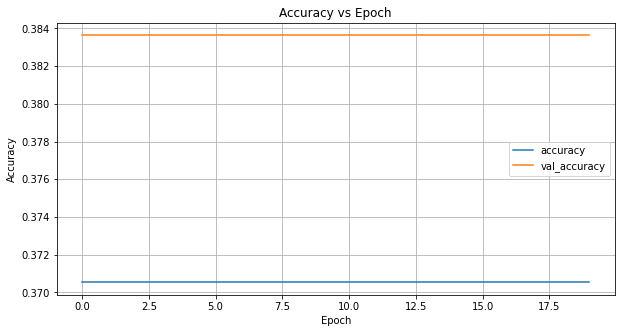

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(len(history.history['accuracy'])),history.history['accuracy'], label= "accuracy")
plt.plot(range(0,len(history.history['val_accuracy'])),history.history['val_accuracy'], label= "val_accuracy")
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch")
plt.legend()
plt.show()

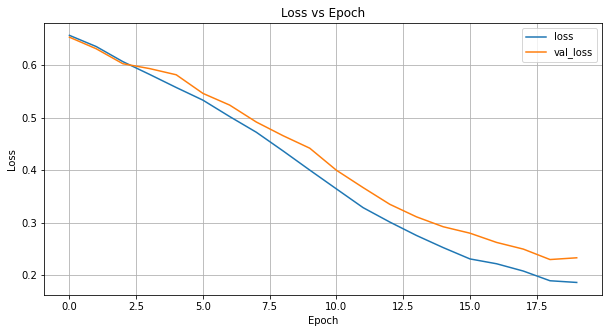

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(0,len(history.history['loss'])),history.history['loss'], label= "loss")
plt.plot(range(0,len(history.history['val_loss'])),history.history['val_loss'], label= "val_loss")
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

372/372 - 5s - loss: 0.2321 - accuracy: 0.3710 - 5s/epoch - 13ms/step

Test accuracy: 0.37104377150535583


In [ ]:
y_pred=model.predict(x_test)

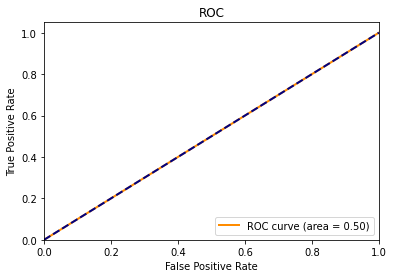

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#roc plot for specific class
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
pred_prob = model.predict(x_test)
#auc scores
auc_score = roc_auc_score(y_test, pred_prob)
print(auc_score)

0.5


In [ ]:
epochs=5
history = model.fit(x_train,
                 y_train,
                 validation_split=0.2,
                 epochs=epochs,
                 batch_size=128)
  #               callbacks=[callbacks])


Epoch 1/5
297/297 [==============================] - 47s 158ms/step - loss: 0.6602 - accuracy: 0.3705 - val_loss: 0.6607 - val_accuracy: 0.3836
Epoch 2/5
297/297 [==============================] - 46s 155ms/step - loss: 0.6497 - accuracy: 0.3705 - val_loss: 0.6546 - val_accuracy: 0.3836
Epoch 3/5
297/297 [==============================] - 46s 156ms/step - loss: 0.6299 - accuracy: 0.3705 - val_loss: 0.6367 - val_accuracy: 0.3836
Epoch 4/5
297/297 [==============================] - 46s 155ms/step - loss: 0.6080 - accuracy: 0.3705 - val_loss: 0.6182 - val_accuracy: 0.3836
Epoch 5/5
297/297 [==============================] - 46s 155ms/step - loss: 0.5873 - accuracy: 0.3705 - val_loss: 0.5963 - val_accuracy: 0.3836
